In [1]:
#importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSC40038 Data/Python/ORG02-24112017-25012023.csv') #reading the csv file

In [3]:
df.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,University of London International Programmes ...,06/03/2018 00:00,NaN,B452158,A502856,2,True,27,12445,Attending,Graduand,PM Ceremony,26/10/2017 10:12,249
1,University of London International Programmes ...,06/03/2018 00:00,NaN,B452158,A502857,2,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:12,249
2,University of London International Programmes ...,06/03/2018 00:00,NaN,B452162,A502861,3,True,0,12445,Attending,Graduand,PM Ceremony,26/10/2017 10:16,249
3,University of London International Programmes ...,06/03/2018 00:00,NaN,B452162,A502862,3,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:16,249
4,University of London International Programmes ...,06/03/2018 00:00,NaN,B452162,A502863,3,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:16,249


In [4]:
df.isnull().sum()

EventName                0
StartDate                0
EventType            19448
BookingReference         0
AttendeeReference        0
GroupSize                0
IsLeadAttendee           0
AttendeeGrossCost        0
EventId                  0
BookingStatus            0
AttendeeType             0
TicketType               0
StatusCreatedDate        0
ClientId                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19448 entries, 0 to 19447
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventName          19448 non-null  object 
 1   StartDate          19448 non-null  object 
 2   EventType          0 non-null      float64
 3   BookingReference   19448 non-null  object 
 4   AttendeeReference  19448 non-null  object 
 5   GroupSize          19448 non-null  int64  
 6   IsLeadAttendee     19448 non-null  bool   
 7   AttendeeGrossCost  19448 non-null  int64  
 8   EventId            19448 non-null  int64  
 9   BookingStatus      19448 non-null  object 
 10  AttendeeType       19448 non-null  object 
 11  TicketType         19448 non-null  object 
 12  StatusCreatedDate  19448 non-null  object 
 13  ClientId           19448 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(8)
memory usage: 1.9+ MB


# Data cleaning

In [6]:
# df.fillna(method='ffill', inplace=True)

In [7]:
df.drop(axis=1, columns='EventType', inplace=True)

In [8]:
df.nunique()


EventName               12
StartDate                8
BookingReference      8198
AttendeeReference    19448
GroupSize               14
IsLeadAttendee           2
AttendeeGrossCost       16
EventId                 12
BookingStatus            3
AttendeeType             8
TicketType              25
StatusCreatedDate     8811
ClientId                 1
dtype: int64

In [9]:
df.duplicated().sum()


0

In [10]:
# df.drop_duplicates(inplace=True)
unique_cols= ['BookingStatus','IsLeadAttendee','StartDate','AttendeeType','TicketType', 'EventName'  ]

In [11]:
for i in unique_cols:
  print(i, 'unique columns are' ,df[i].unique())

BookingStatus unique columns are ['Attending' 'Cancelled' 'Waiting List']
IsLeadAttendee unique columns are [ True False]
StartDate unique columns are ['06/03/2018 00:00' '04/07/2019 00:00' '14/09/2018 10:00'
 '27/09/2018 00:00' '19/12/2019 09:30' '03/03/2022 00:00'
 '09/12/2021 00:00' '13/07/2022 00:00']
AttendeeType unique columns are ['Graduand' 'Guest' 'Child' 'Attendee' 'Procession' 'Academic'
 ' Graduand Waiting List' 'Teaching Centre Staff']
TicketType unique columns are ['PM Ceremony ' 'Guest PM Ceremony' 'AM Ceremony' 'Guest AM Ceremony'
 'Child (PM ceremony)' 'Child (AM ceremony)' 'Evening dinner '
 '121 Session' 'Standard' '14:30 Ceremony' 'Guest 14:30 Ceremony'
 '17:00 Ceremony' 'Guest 17:00 Ceremony' '11:00 Ceremony'
 'Guest 11:00 Ceremony' '13th Ceremony' '15th Ceremony'
 'Guest 15th Ceremony' '14th Ceremony' 'Guest 14th Ceremony'
 'Guest 13th Ceremony' '3 day ticket am/pm' 'Academic Ticket' 'Any day'
 'Teaching Centre Staff']
EventName unique columns are ['University of 

In [12]:
df.groupby('StartDate').sum().head()

,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,ClientId
StartDate,,,,,
03/03/2022 00:00,14128,1577,122730,84181282,1051527
04/07/2019 00:00,15556,1684,183219,77889312,1176276
06/03/2018 00:00,12119,1336,148384,46631415,933003
09/12/2021 00:00,1350,121,6050,9737672,96114
13/07/2022 00:00,12515,3432,57125,164279356,1573680


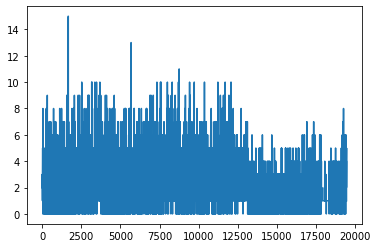

In [13]:
df['GroupSize'].plot()

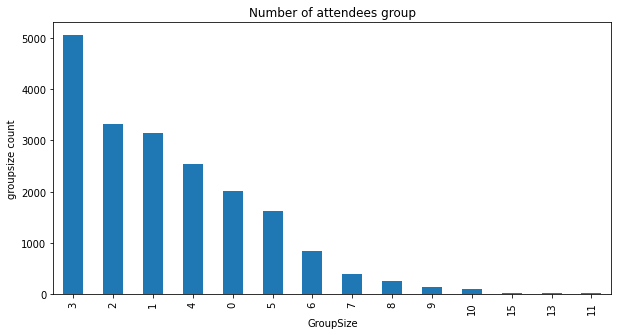

In [14]:
df.GroupSize.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of attendees group")
plt.ylabel('groupsize count')
plt.xlabel('GroupSize');

In [15]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(df['GroupSize'], )
# ax.set_xlabel('HP')
# ax.set_ylabel('Price')
# plt.show()

# Preprocessing

In [16]:
df2 = df.copy()

In [17]:
unique_column= ['BookingStatus','IsLeadAttendee','AttendeeType','TicketType', 'EventName'  ]

In [18]:
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()
for i in unique_column:
  df2[i] = encode.fit_transform(df2[i])
df.head()

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,University of London International Programmes ...,06/03/2018 00:00,B452158,A502856,2,True,27,12445,Attending,Graduand,PM Ceremony,26/10/2017 10:12,249
1,University of London International Programmes ...,06/03/2018 00:00,B452158,A502857,2,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:12,249
2,University of London International Programmes ...,06/03/2018 00:00,B452162,A502861,3,True,0,12445,Attending,Graduand,PM Ceremony,26/10/2017 10:16,249
3,University of London International Programmes ...,06/03/2018 00:00,B452162,A502862,3,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:16,249
4,University of London International Programmes ...,06/03/2018 00:00,B452162,A502863,3,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:16,249


In [19]:
df2.head()

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,11,06/03/2018 00:00,B452158,A502856,2,1,27,12445,0,4,22,26/10/2017 10:12,249
1,11,06/03/2018 00:00,B452158,A502857,2,0,50,12445,0,5,21,26/10/2017 10:12,249
2,11,06/03/2018 00:00,B452162,A502861,3,1,0,12445,0,4,22,26/10/2017 10:16,249
3,11,06/03/2018 00:00,B452162,A502862,3,0,50,12445,0,5,21,26/10/2017 10:16,249
4,11,06/03/2018 00:00,B452162,A502863,3,0,50,12445,0,5,21,26/10/2017 10:16,249


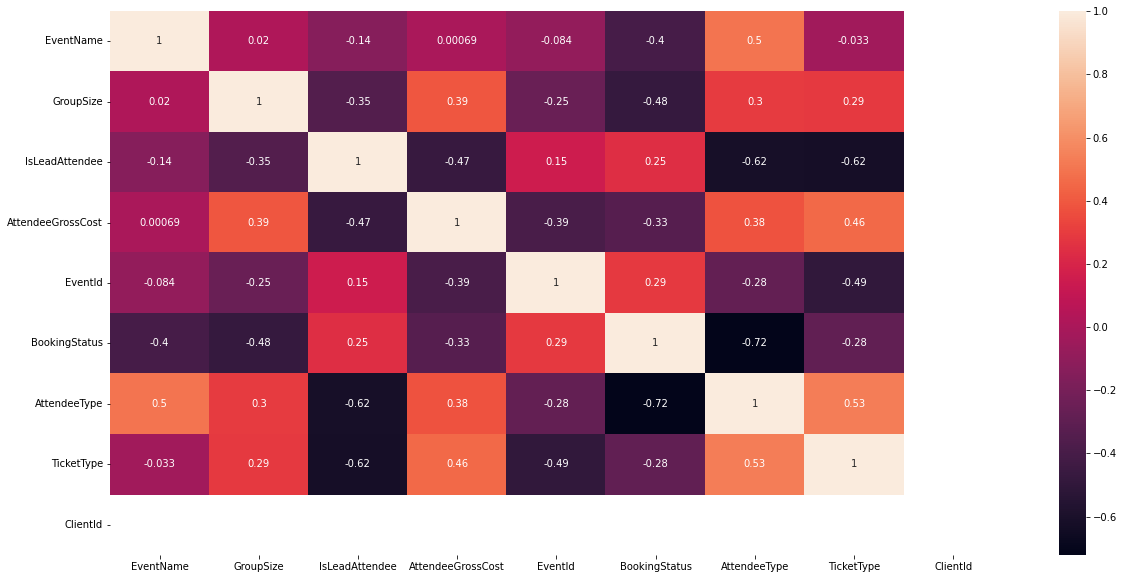

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), annot = True)

In [21]:
df2['StartDate'] = pd.to_datetime(df2['StartDate'], infer_datetime_format=True)

In [22]:
df2['StatusCreatedDate'] = pd.to_datetime(df2['StatusCreatedDate'], infer_datetime_format=True)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19448 entries, 0 to 19447
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EventName          19448 non-null  int64         
 1   StartDate          19448 non-null  datetime64[ns]
 2   BookingReference   19448 non-null  object        
 3   AttendeeReference  19448 non-null  object        
 4   GroupSize          19448 non-null  int64         
 5   IsLeadAttendee     19448 non-null  int64         
 6   AttendeeGrossCost  19448 non-null  int64         
 7   EventId            19448 non-null  int64         
 8   BookingStatus      19448 non-null  int64         
 9   AttendeeType       19448 non-null  int64         
 10  TicketType         19448 non-null  int64         
 11  StatusCreatedDate  19448 non-null  datetime64[ns]
 12  ClientId           19448 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 1.9+ 

In [24]:
df2.describe()

,EventName,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId
count,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.0
mean,7.523447,2.864870,0.421534,26.712155,19720.783680,0.214624,4.306458,15.551831,249.0
std,2.937263,1.985768,0.493817,32.696315,5114.849647,0.529005,1.188889,6.732524,0.0
min,0.000000,0.000000,0.000000,-25.000000,12445.000000,0.000000,0.000000,0.000000,249.0
25%,5.000000,1.000000,0.000000,0.000000,16488.000000,0.000000,4.000000,8.000000,249.0
50%,6.000000,3.000000,0.000000,25.000000,19934.000000,0.000000,5.000000,20.000000,249.0
75%,10.000000,4.000000,1.000000,50.000000,25956.000000,0.000000,5.000000,21.000000,249.0
max,11.000000,15.000000,1.000000,995.000000,26165.000000,2.000000,7.000000,24.000000,249.0


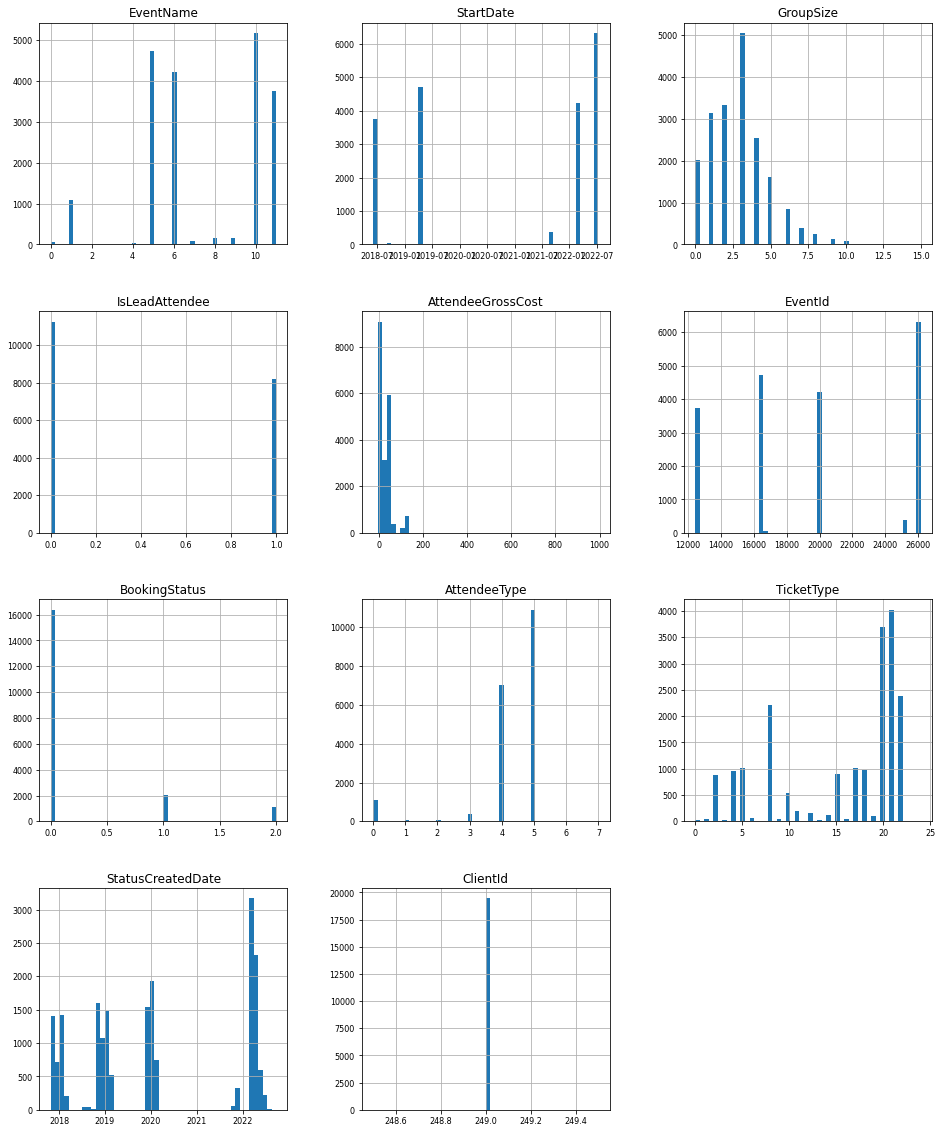

In [25]:
df2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

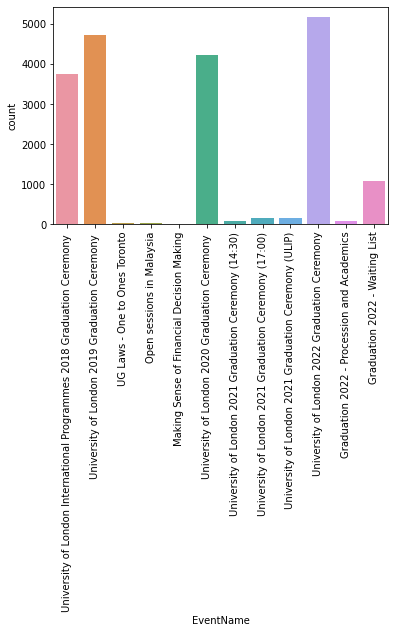

In [26]:
sns.countplot(x='EventName', data=df);
plt.xticks(rotation=90);

In [27]:
# plt.figure(figsize=(16,5), dpi=100)
# plt.plot(df['EventName'],  color='tab:red')
# plt.gca().set(title='title')
# plt.xticks(rotation=90)
# plt.show()

# sns.pairplot(df, hue='StartDate');

In [28]:
# import matplotlib.pyplot as plt
# def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.xticks(rotation=90)
#     plt.show()


# for i in unique_column:
#     plot_df(df, x=df2.index, y=df2[i], title=i)

In [29]:
df3 = df2.copy()

In [30]:
df3

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,11,2018-06-03,B452158,A502856,2,1,27,12445,0,4,22,2017-10-26 10:12:00,249
1,11,2018-06-03,B452158,A502857,2,0,50,12445,0,5,21,2017-10-26 10:12:00,249
2,11,2018-06-03,B452162,A502861,3,1,0,12445,0,4,22,2017-10-26 10:16:00,249
3,11,2018-06-03,B452162,A502862,3,0,50,12445,0,5,21,2017-10-26 10:16:00,249
4,11,2018-06-03,B452162,A502863,3,0,50,12445,0,5,21,2017-10-26 10:16:00,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19443,10,2022-07-13,B1075279,A1178687,5,0,25,25956,0,5,18,2022-07-14 13:49:00,249
19444,10,2022-07-13,B1071435,A1178755,4,0,25,25956,0,5,17,2022-07-15 11:10:00,249
19445,10,2022-07-13,B1071435,A1178756,4,0,25,25956,0,5,17,2022-07-15 11:10:00,249
19446,10,2022-07-13,B1071435,A1178757,4,0,25,25956,0,5,17,2022-07-15 11:10:00,249


>> Getting days to event 

In [31]:
df3['time_to_event'] = pd.DatetimeIndex(df['StartDate']) - pd.DatetimeIndex(df['StatusCreatedDate'])

In [32]:
df3['days_to_event'] = df3['time_to_event']/ np.timedelta64(1, 'D')

In [33]:
df3.head()

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,time_to_event,days_to_event
0,11,2018-06-03,B452158,A502856,2,1,27,12445,0,4,22,2017-10-26 10:12:00,249,219 days 13:48:00,219.575000
1,11,2018-06-03,B452158,A502857,2,0,50,12445,0,5,21,2017-10-26 10:12:00,249,219 days 13:48:00,219.575000
2,11,2018-06-03,B452162,A502861,3,1,0,12445,0,4,22,2017-10-26 10:16:00,249,219 days 13:44:00,219.572222
3,11,2018-06-03,B452162,A502862,3,0,50,12445,0,5,21,2017-10-26 10:16:00,249,219 days 13:44:00,219.572222
4,11,2018-06-03,B452162,A502863,3,0,50,12445,0,5,21,2017-10-26 10:16:00,249,219 days 13:44:00,219.572222


In [34]:
# sort dataframe by start date
df3 = df3.sort_values(by='days_to_event') 

In [35]:
# setting dataframe index to start date for better analysis
df4 = df3.set_index('StartDate')

In [36]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19448 entries, 2021-09-12 00:00:00 to 2022-03-03 00:00:00
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   EventName          19448 non-null  int64          
 1   BookingReference   19448 non-null  object         
 2   AttendeeReference  19448 non-null  object         
 3   GroupSize          19448 non-null  int64          
 4   IsLeadAttendee     19448 non-null  int64          
 5   AttendeeGrossCost  19448 non-null  int64          
 6   EventId            19448 non-null  int64          
 7   BookingStatus      19448 non-null  int64          
 8   AttendeeType       19448 non-null  int64          
 9   TicketType         19448 non-null  int64          
 10  StatusCreatedDate  19448 non-null  datetime64[ns] 
 11  ClientId           19448 non-null  int64          
 12  time_to_event      19448 non-null  timedelta64[ns]
 13  days_to_eve

In [37]:
# dropping negative values
df4.drop(df4[df4['days_to_event'] < 0].index, inplace = True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4225 entries, 2019-12-19 09:30:00 to 2022-03-03 00:00:00
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   EventName          4225 non-null   int64          
 1   BookingReference   4225 non-null   object         
 2   AttendeeReference  4225 non-null   object         
 3   GroupSize          4225 non-null   int64          
 4   IsLeadAttendee     4225 non-null   int64          
 5   AttendeeGrossCost  4225 non-null   int64          
 6   EventId            4225 non-null   int64          
 7   BookingStatus      4225 non-null   int64          
 8   AttendeeType       4225 non-null   int64          
 9   TicketType         4225 non-null   int64          
 10  StatusCreatedDate  4225 non-null   datetime64[ns] 
 11  ClientId           4225 non-null   int64          
 12  time_to_event      4225 non-null   timedelta64[ns]
 13  days_to_even

>>>> decoding encoded values

In [38]:
# decoding encoded labels from dataframe
olddf = pd.DataFrame(df['EventName'])
decode = pd.DataFrame(olddf['EventName'].unique())



In [39]:
# newdf = pd.DataFrame(df4['EventName'])
# newdf 
decoded = pd.DataFrame(df2['EventName'].unique())
ref_df = pd.DataFrame()
ref_df['decode']=decode
ref_df['decoded']=decoded
ref_df

,decode,decoded
0,University of London International Programmes ...,11
1,University of London 2019 Graduation Ceremony,5
2,UG Laws - One to Ones Toronto,4
3,Open sessions in Malaysia,3
4,Making Sense of Financial Decision Making,2
5,University of London 2020 Graduation Ceremony,6
6,University of London 2021 Graduation Ceremony ...,7
7,University of London 2021 Graduation Ceremony ...,8
8,University of London 2021 Graduation Ceremony ...,9
9,University of London 2022 Graduation Ceremony,10


In [40]:
df4 = df4.resample('w').sum()

In [41]:
df4

,EventName,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId,days_to_event
StartDate,,,,,,,,,,
2019-12-22,4,2,2,1990,42826,0,4,46,498,3.940069e+01
2019-12-29,0,0,0,0,0,0,0,0,0,0.000000e+00
2020-01-05,0,0,0,0,0,0,0,0,0,0.000000e+00
2020-01-12,0,0,0,0,0,0,0,0,0,0.000000e+00
2020-01-19,0,0,0,0,0,0,0,0,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
2022-02-06,0,0,0,0,0,0,0,0,0,0.000000e+00
2022-02-13,0,0,0,0,0,0,0,0,0,0.000000e+00
2022-02-20,0,0,0,0,0,0,0,0,0,0.000000e+00


## Groupby section